# Importing data and libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\BRCA.csv")

# Data Cleaning

In [51]:
df.drop(columns=['Patient_ID'],inplace = True)
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])

In [52]:
df.dropna(inplace = True)

# Data transformation and feature cration

In [53]:
df['Tumour_Stage'].replace({'I':0,'II':2,'III':3},inplace = True)
df['ER status'].replace({'Positive':0},inplace = True)
df['PR status'].replace({'Positive':0},inplace = True)
df['HER2 status'].replace({'Positive':0,'Negative':1},inplace = True)
df['Patient_Status'].replace({'Alive':0,'Dead':1},inplace = True)

In [54]:
df['Date_lenght'] = df['Date_of_Last_Visit']-df['Date_of_Surgery']

In [55]:
df['Date_lenght'] = df['Date_lenght'].astype(str)
df['Date_lenght'] = df['Date_lenght'].str.strip(' days')
df['Date_lenght']=df['Date_lenght'].astype(int)

# Plotting the data

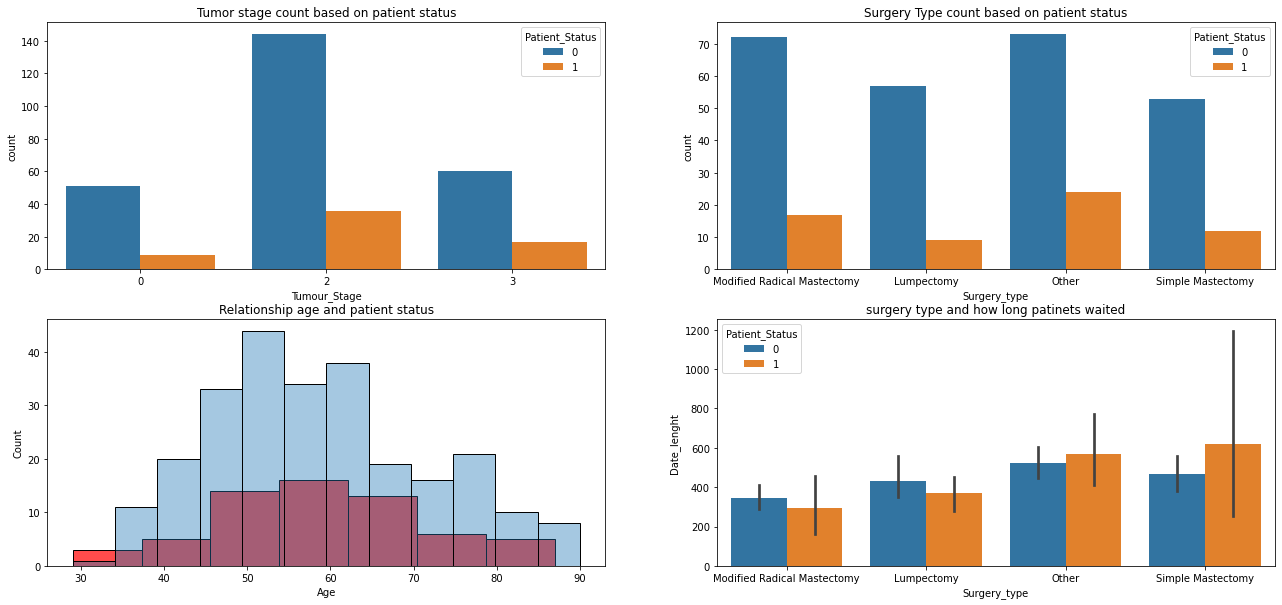

In [56]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize=(22,10))
sns.countplot(ax=ax[0,0],x='Tumour_Stage',data = df,hue ='Patient_Status')
sns.countplot(ax = ax[0,1], x = 'Surgery_type',data = df, hue = 'Patient_Status')
sns.histplot(ax = ax[1,0],x ='Age',data = df[df['Patient_Status']==1],color = 'red',alpha = 0.7)
sns.histplot(ax = ax[1,0],x ='Age',data = df[df['Patient_Status']==0],alpha = 0.4)
sns.barplot(ax = ax[1,1],x = 'Surgery_type',y='Date_lenght',data = df,hue ='Patient_Status')

ax[0,0].title.set_text('Tumor stage count based on patient status')
ax[0,1].title.set_text('Surgery Type count based on patient status')
ax[1,0].title.set_text('Relationship age and patient status')
ax[1,1].title.set_text('surgery type and how long patinets waited')

plt.show()

# Data correlation

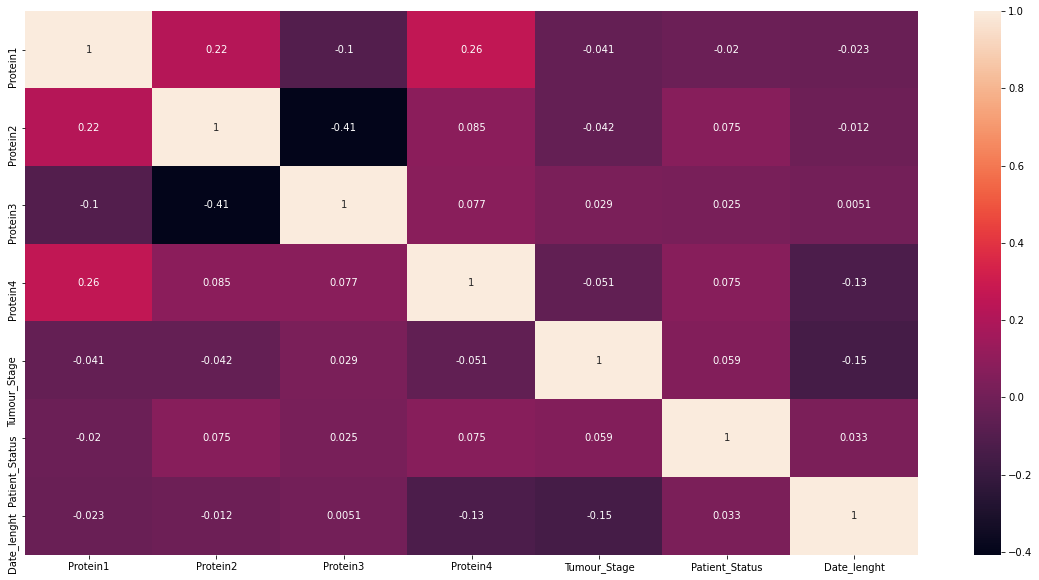

In [57]:
heat = df[['Protein1','Protein2','Protein3','Protein4','Tumour_Stage','Patient_Status','Date_lenght']].corr()
plt.figure(figsize=(20,10))
sns.heatmap(data = heat,annot = True)
plt.show()

# Preparing the data for ML

In [58]:
df.drop(columns = ['Gender','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],inplace = True)

In [59]:
df = pd.get_dummies(df,columns = ['Histology','Surgery_type'])

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [63]:
X = df.drop('Patient_Status',axis = 1)
y = df['Patient_Status']

### Balancing the classes 

In [64]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,stratify = y)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler. transform(X_test)

In [67]:
alive = (y==0).sum()
dead =  (y==0).sum()

print(alive)
print(dead)

255
255


# Logistic regression

[0.8294623655913979]


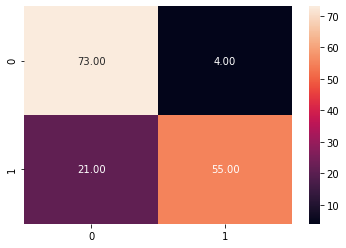

In [68]:
logreg = LogisticRegression()

log_reg_results = []

log= logreg.fit(X_train_scaled,y_train)
log.predict(X_test_scaled)
log.score(X_test_scaled,y_test)

log_reg_results.append(np.mean(cross_val_score(log,X_test_scaled,y_test,cv=5)))
print(log_reg_results)

model_log = logreg.predict(X_test_scaled)
mode_cm_log = confusion_matrix(y_test,model_log)
sns.heatmap(data = mode_cm_log,annot = True,fmt ='.2f')
plt.show()

# Random Forest

The accuracy of Random Forest Classifier is : [0.7513978494623655]


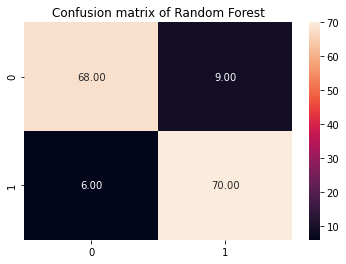

In [69]:
rf_results=[]

rf = RandomForestClassifier(n_estimators = 100,max_depth =10 )
rf.fit(X_train_scaled,y_train)
rf.predict(X_test_scaled)
rf_results.append(np.mean(cross_val_score(rf,X_test_scaled,y_test,cv=5)))
print('The accuracy of Random Forest Classifier is :',rf_results)

model_rf = rf.predict(X_test_scaled)
model_cms = confusion_matrix(y_test,model_rf)
sns.heatmap(data = model_cms,annot = True,fmt='.2f');
plt.title('Confusion matrix of Random Forest');

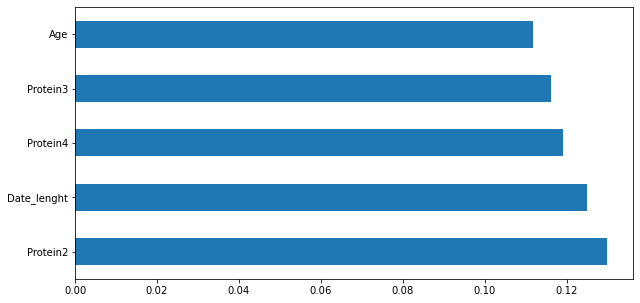

In [70]:
from sklearn.feature_selection import RFE
feat_importances = pd.Series(rf.feature_importances_,index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh',figsize=(10,5))
plt.show()

# Gradient Booster

0.8758169934640523


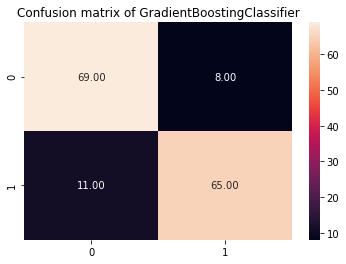

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

grad = model.predict(X_test)
grad_cms = confusion_matrix(y_test,grad)
sns.heatmap(data = grad_cms,annot = True,fmt='.2f');
plt.title('Confusion matrix of GradientBoostingClassifier');

# Plotting the model performance

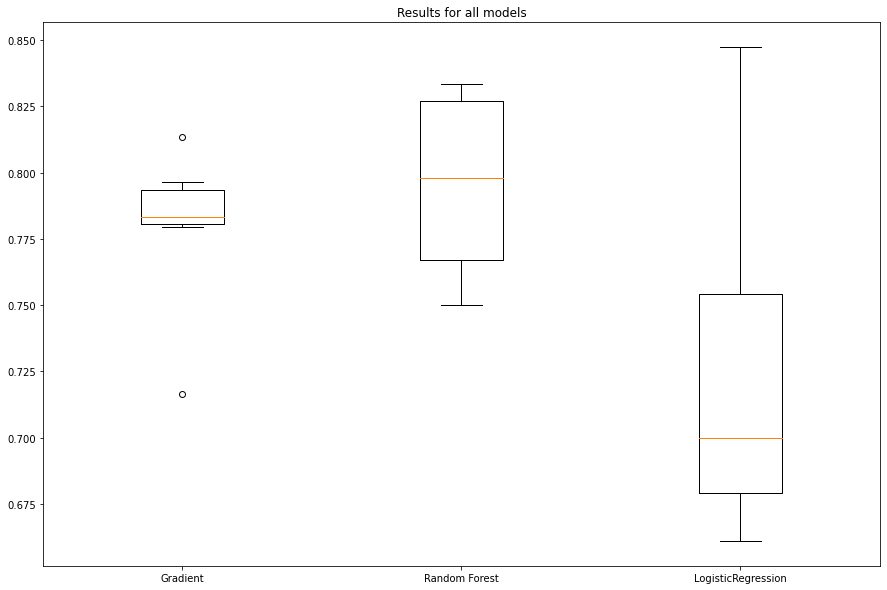

In [72]:
plt.figure(figsize=(15,10))
plt.title('Results for all models')
models = {"Gradient": GradientBoostingClassifier(n_estimators=100), "Random Forest":RandomForestClassifier(n_estimators = 100,max_depth =10 ),"LogisticRegression": LogisticRegression()}

outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

# Sumary 

Breast cancer is one of the most common cancers among women, with over 250,000 new cases diagnosed each year in the United States alone. Catching breast cancer early is the best way to improve outcomes. In stage 1, when the tumor is small and has not spread, the 5-year survival rate is an excellent 98%. Unfortunately, many cancers are not caught this early. The 5-year survival rates drop significantly as the cancer advances - to 84% in stage 2, 67% in stage 3, and just 27% in stage 4 metastatic breast cancer.

Treatment options also impact survival. For early-stage cancers, breast-conserving surgery such as lumpectomy paired with radiation therapy has become the standard approach, with 5-year survival rates around 90%. More invasive surgeries like modified radical mastectomy and simple mastectomy have slightly lower 5-year survival rates of 83% and 78% respectively. The longer a patient waits to get surgery after diagnosis, the higher the risk that cancer may spread and survival rates decline.

Predictive analytics and machine learning models can help optimize treatment by identifying the most significant risk factors for any individual patient. Models like random forest and gradient boosting algorithms have achieved 73-88% accuracy in predicting outcomes. The most important variables include the patient's age at diagnosis, tumor stage and characteristics, receptor status, lymph node involvement, levels of certain proteins, and time between diagnosis and treatment. With further research, these models are expected to become even more accurate. Overall, the key to fighting breast cancer is early detection, timely and appropriate treatment, and personalized medicine enabled by advanced analytics.